# Author- Ashna Chauhan

## The Sparks Foundation, GRIP, April'21

## Task-3- Exploratory Data Analysis- Retail

## Importing relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Importing data

In [2]:
data = pd.read_csv("C:\\Users\\Shubham\\Downloads\\SampleSuperstore.csv")
data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


## Getting descriptive statistics for data

In [3]:
data.describe(include = "all")

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


In [4]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

#### From the above statistics we see that there are no missing values. SInce United States is the only country in all the observations we can drop it from the analysis. The variable postal code can also be dropped since the information it gives is explained by variable city.

In [5]:
data1 =  data.drop(['Country', 'Postal Code'], axis =1)
data1

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


## Detecting outliers

### We will plot each quantitative variable to check for outliers 

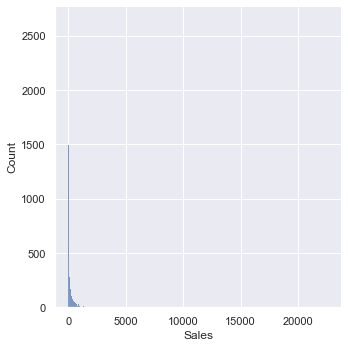

In [6]:
# Sales variable
sns.displot(data1["Sales"])

#### The sales distribution is positively skewed, so we drop top 1% sales data, removing undue influence of outliers

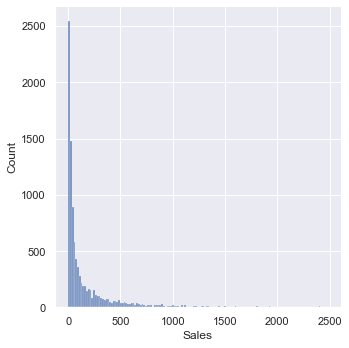

In [7]:
q1 = data1['Sales'].quantile(0.99)
data2 = data1[data1["Sales"] <q1]
sns.displot(data2["Sales"])

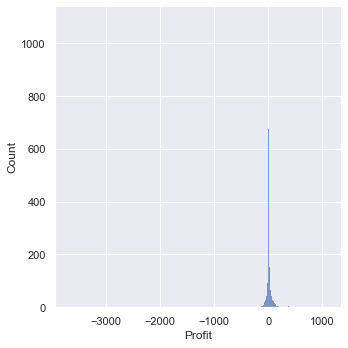

In [8]:
# Profit variable
sns.displot(data2["Profit"])

#### Profits distribution is skewed to the left, thus we remove lowest 0.05% data to reduce the effects of outliers

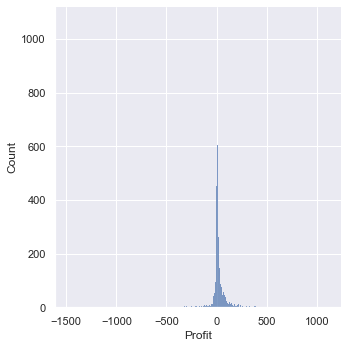

In [9]:
q2 = data2['Profit'].quantile(0.0005)
data3 = data2[data2["Profit"] >q2]
sns.displot(data3["Profit"])

In [10]:
data3 = data3.reset_index(drop = True)
data3.describe(include="all")

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9889,9889,9889,9889,9889,9889,9889,9889.000000,9889.000000,9889.000000,9889.000000
unique,4,3,531,49,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,New York City,California,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5907,5137,897,1979,3172,5996,1504,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185.628796,3.764991,0.156157,21.419245
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,321.794759,2.208303,0.206419,103.542854
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-1480.033500
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.040000,2.000000,0.000000,1.724800
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.512000,3.000000,0.200000,8.496600
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200.795000,5.000000,0.200000,28.598400


# Exploring the data

In [11]:
sns.set(rc={'figure.figsize':(12,7)})

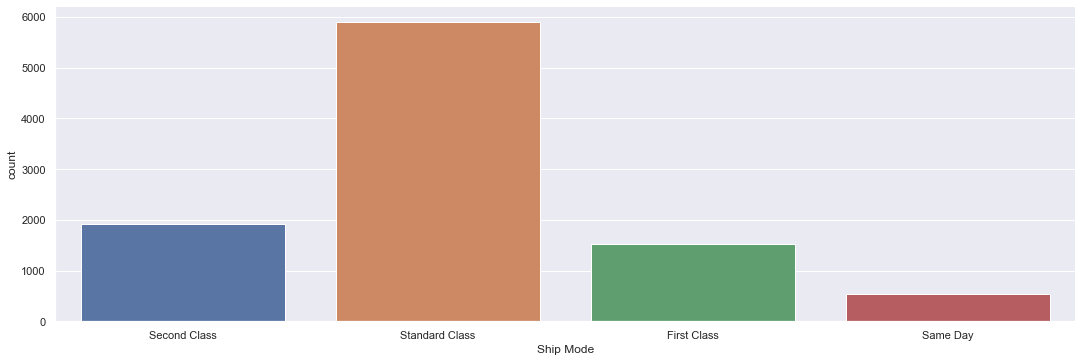

In [12]:
# Analysing Ship mode variable
sns.catplot(x="Ship Mode", kind ='count', data=data3, height=5, aspect=3)

#### Standard Class is the most common shipping mode

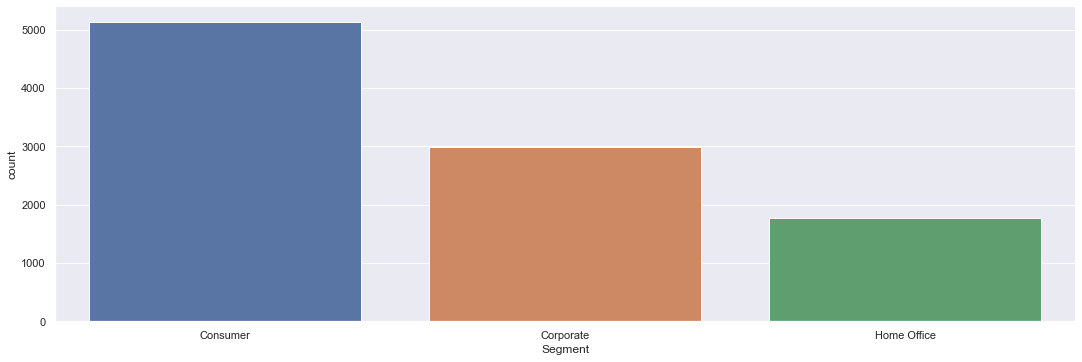

In [13]:
# Analysing Segment variable
sns.catplot(x="Segment", kind ='count', data=data3, height=5, aspect=3)

#### Consumers are the most common segment

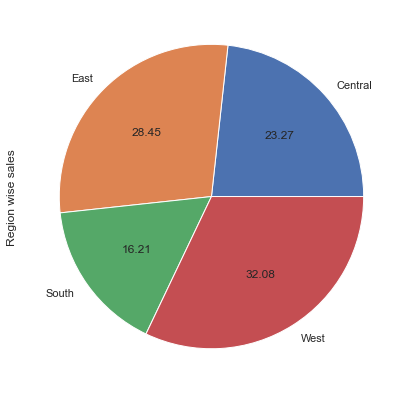

In [14]:
# Analysing region wise data
data3.groupby('Region').size().plot(kind='pie',autopct='%.2f')
plt.ylabel('Region wise sales')
plt.show()

#### Western region accounts for almost 32% of total sales.

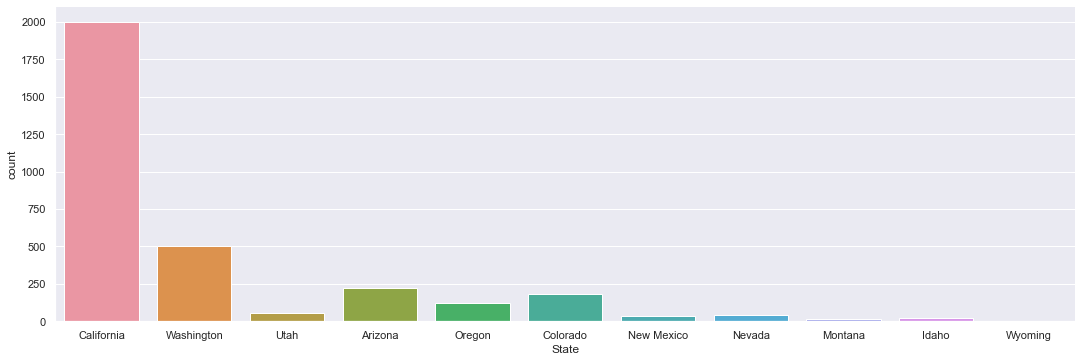

In [15]:
# Analysing West region
df = data[data['Region']=='West']
sns.catplot(x="State", kind='count', data=df, height=5, aspect=3)

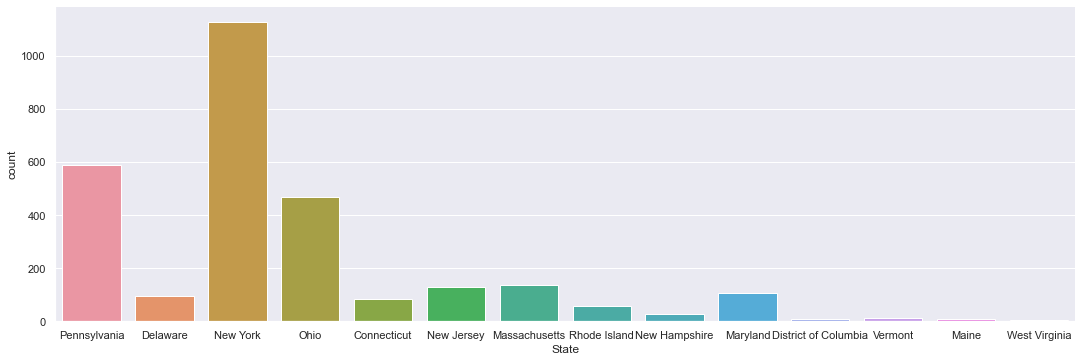

In [16]:
# Analysing East region
df = data[data['Region']=='East']
sns.catplot(x="State", kind='count', data=df, height=5, aspect=3)

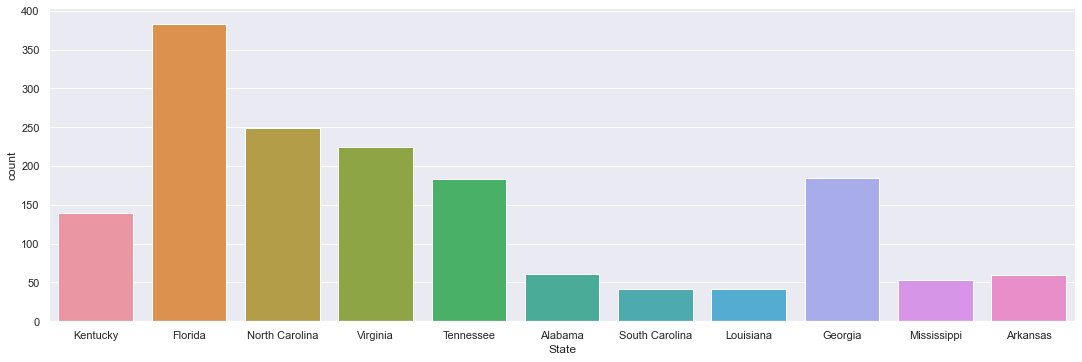

In [17]:
# Analysing South region
df = data[data['Region']=='South']
sns.catplot(x="State", kind='count', data=df, height=5, aspect=3)

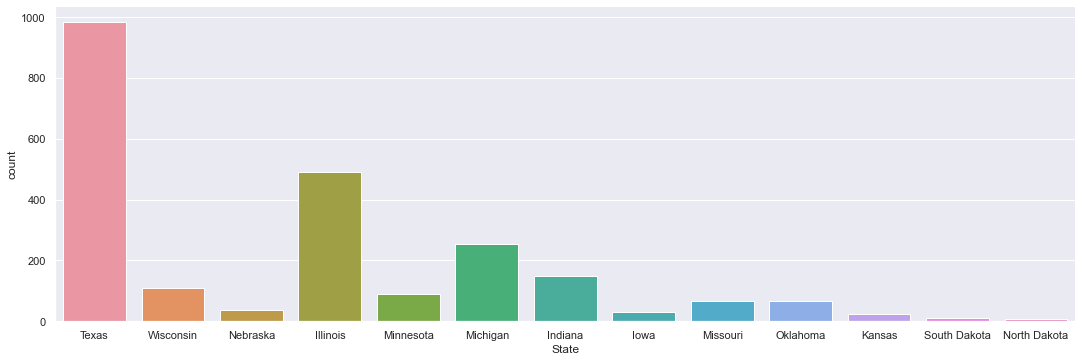

In [18]:
# Analysing Central region
df = data[data['Region']=='Central']
sns.catplot(x="State", kind='count', data=df, height=5, aspect=3)

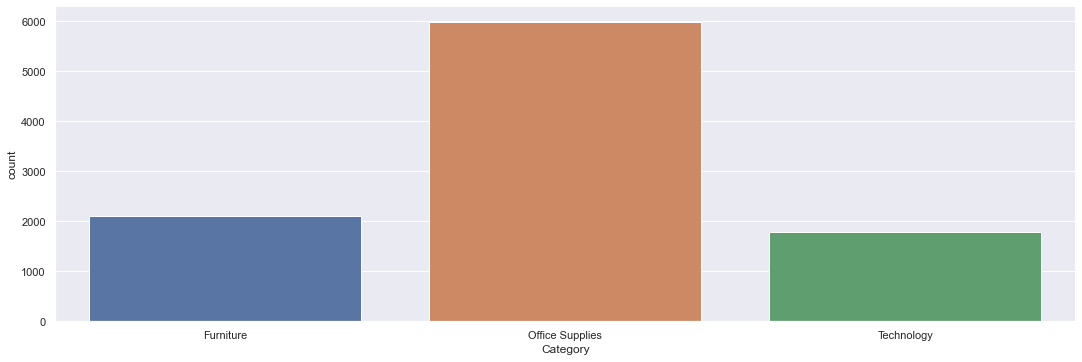

In [19]:
# Analysing categories and sub categories of products
sns.catplot(x='Category', kind='count', data=data3, height=5, aspect=3)

#### Office supplies are the most coomon category of products sold.

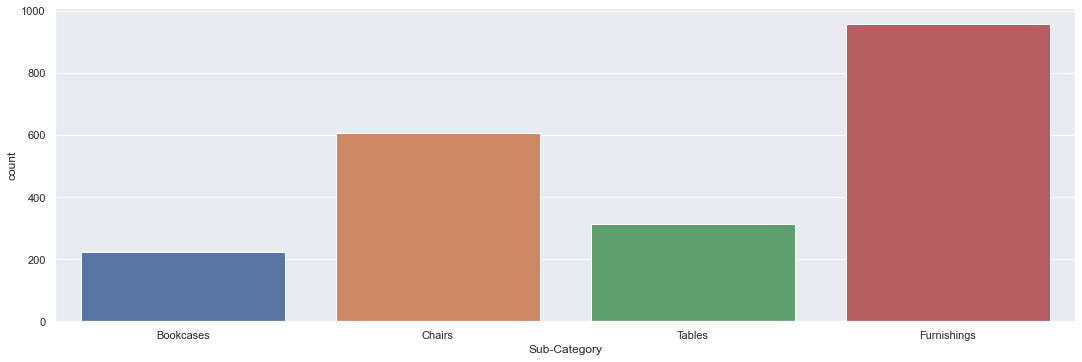

In [20]:
# Analysing Furniture category
df = data3[data3['Category']=='Furniture']
sns.catplot(x="Sub-Category", kind='count', data=df, height=5, aspect=3)

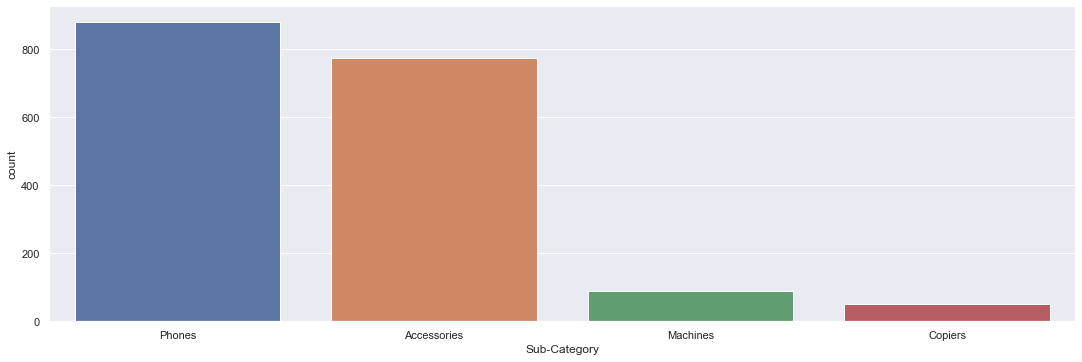

In [21]:
# Analysing Technology category
df = data3[data3['Category']=='Technology']
sns.catplot(x="Sub-Category", kind='count', data=df, height=5, aspect=3)

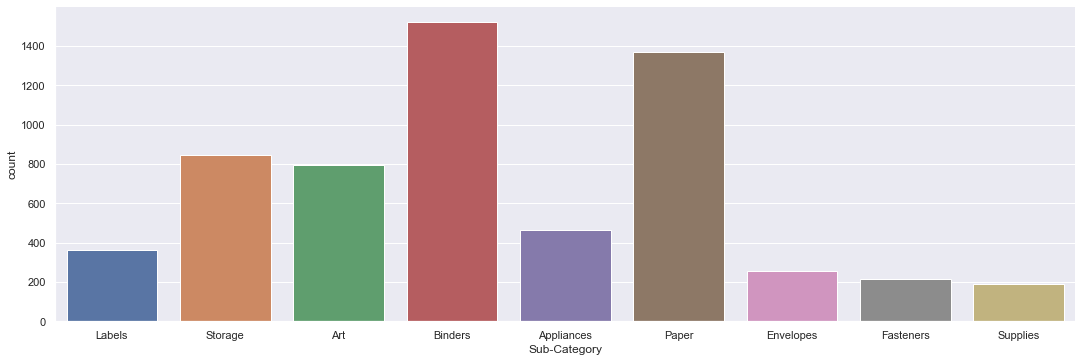

In [22]:
# Analysing Office Supplies category
df = data[data['Category']=='Office Supplies']
sns.catplot(x="Sub-Category", kind='count', data=df, height=5, aspect=3)

## Analysing Correlation between variables

In [23]:
# Importing relevant module to calculate correlation coefficient
from scipy.stats import pearsonr

### Quantitative Variables

Pearson Correlation Coefficient between Sales and Quantity is 0.26154883233351156


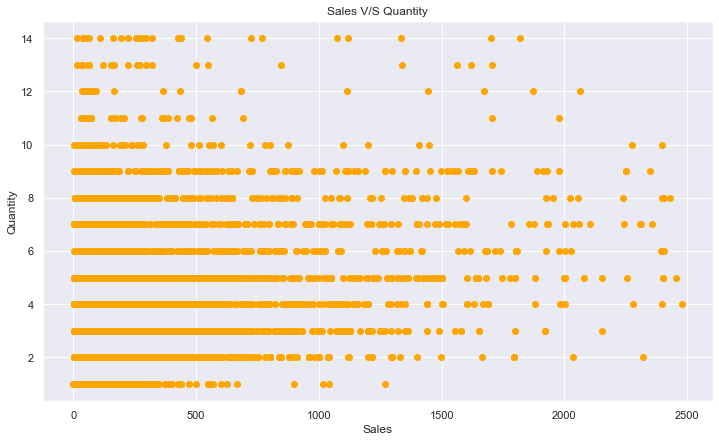

In [24]:
# Sales and Quantity
corrSQ,_ = pearsonr(data3["Sales"], data3["Quantity"])
print( "Pearson Correlation Coefficient between Sales and Quantity is", corrSQ)
plt.scatter(data3['Sales'],data3['Quantity'], c="Orange")
plt.xlabel("Sales")
plt.ylabel("Quantity")
plt.title("Sales V/S Quantity")
plt.show()

Pearson Correlation Coefficient between Profit and sales is 0.38319580541295184


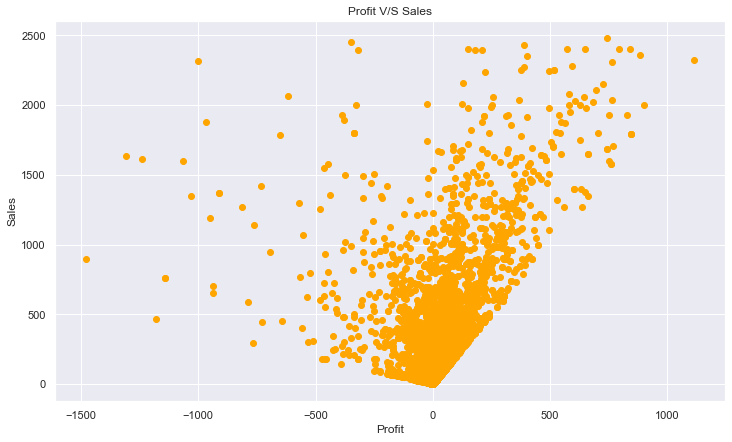

In [25]:
# Profits and Sales
corrPS,_ = pearsonr(data3["Profit"], data3["Sales"])
print( "Pearson Correlation Coefficient between Profit and sales is", corrPS)
plt.scatter(data3['Profit'],data3['Sales'], c="Orange")
plt.xlabel("Profit")
plt.ylabel("Sales")
plt.title("Profit V/S Sales")
plt.show()

#### As can be seen there doesn't exist a perfect positive relationship between profits and sales. There are certain areas where despite high sales the superstore has been incurring losses. We  will try and analyze these areas.

Pearson Correlation Coefficient between Profit and discount is -0.3600037860612376
Pearson Correlation Coefficient between Sales and discount is -0.04905869591038996


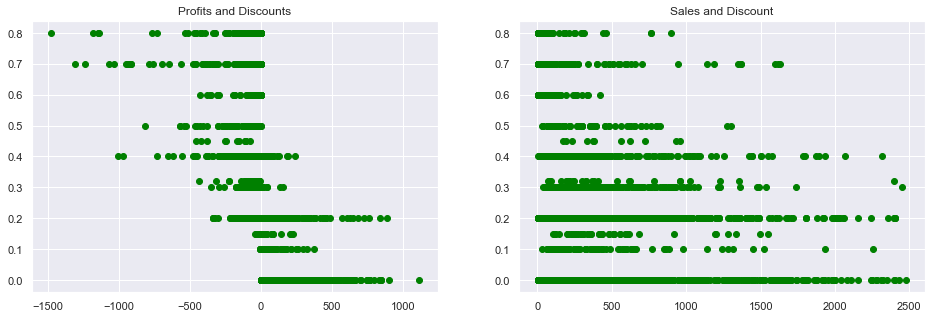

In [26]:
# Profits and Discount, Sales and Discount
corrPD,_ = pearsonr(data3["Profit"], data3["Discount"])
corrSD,_ = pearsonr(data3["Sales"], data3["Discount"])
print( "Pearson Correlation Coefficient between Profit and discount is", corrPD)
print( "Pearson Correlation Coefficient between Sales and discount is", corrSD)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,5))
ax1.scatter(data3['Profit'],data3['Discount'], c="Green")
ax1.set_title('Profits and Discounts')
ax2.scatter(data3['Sales'],data3['Discount'], c="Green")
ax2.set_title("Sales and Discount")
plt.show()

#### As can be seen that profits and discounts are negatively correlated. Even though the degree of correlation is not high still we see that discounts rates as high as 60-80% are causing the superstore's profits to deteriorate. Moreover higher discounts are not getting converted into higher sales.Thus, the superstore should refrain from offering its customers such heavy discounts

### Categorical Variables

<AxesSubplot:xlabel='Ship Mode', ylabel='Profit'>

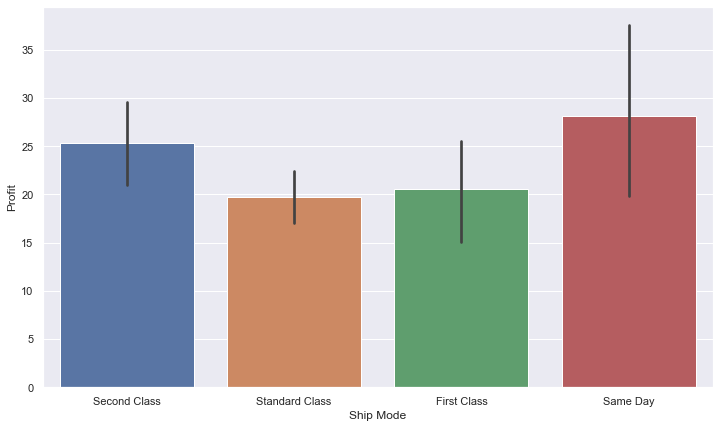

In [27]:
# Profits and Ship Mode
sns.barplot(x="Ship Mode", y="Profit", data=data3)

<AxesSubplot:xlabel='Region', ylabel='Profit'>

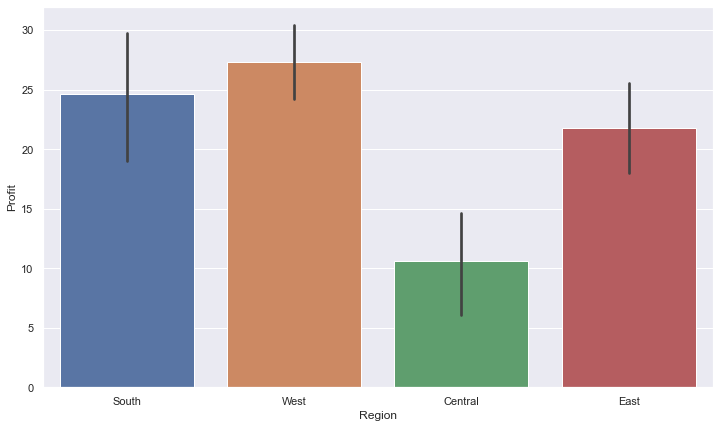

In [28]:
# Profits and Region
sns.barplot(x="Region", y="Profit", data=data3)

<AxesSubplot:xlabel='Segment', ylabel='Profit'>

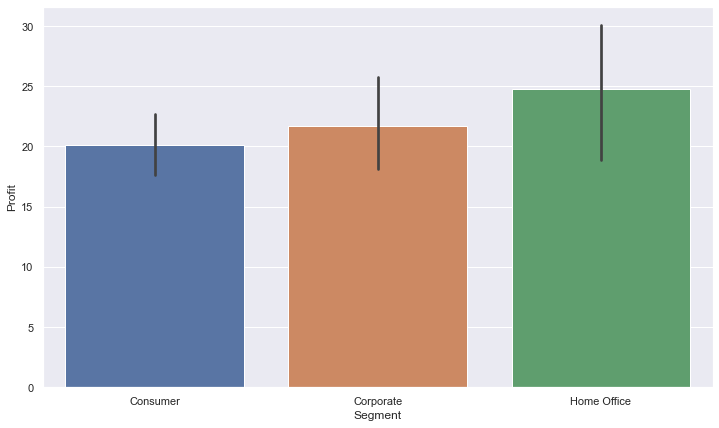

In [29]:
# Profits and Segment
sns.barplot(x="Segment", y="Profit", data=data3)

<AxesSubplot:xlabel='Category', ylabel='Profit'>

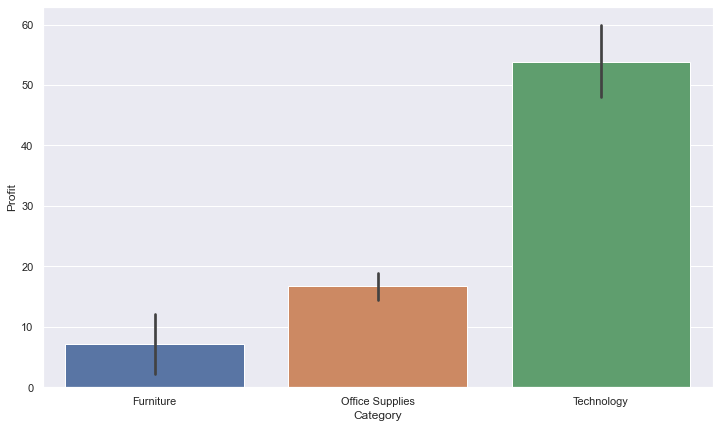

In [30]:
# Profits and Category
sns.barplot(x="Category", y="Profit", data=data3)

<AxesSubplot:xlabel='Sub-Category', ylabel='Profit'>

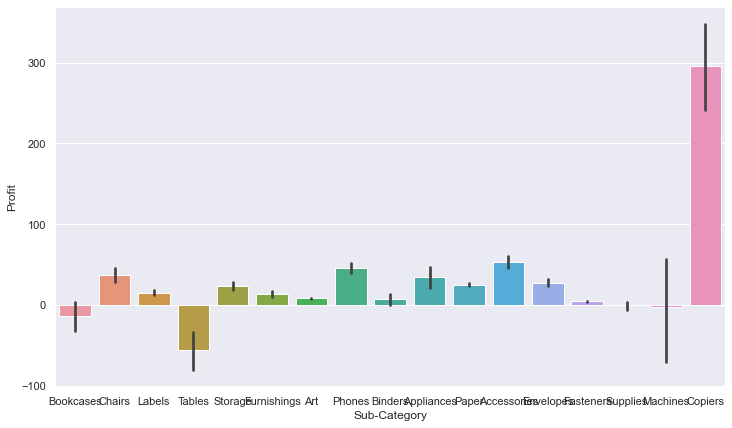

In [31]:
# Profits and Sub-Category
sns.barplot(x="Sub-Category", y="Profit", data=data3)

#### We see that same day shipping mode is most profitable for the superstore.The home office segment contributes significantly to profits. West and south region account for majority of profits made by the superstore. Also, in categories, technology and  in sub category,copiers are the most profitable components.                                                                                                                                     The superstore is incurring losses on bookcases and tables, thus this is the sub-category that should be paid more attention to improve the profitability.